In [2]:
import numpy as np
import matplotlib.pyplot as plt

The Genetic Algorithm works by initializing the population at random, creating **m** individuals of length **n** bits. 

The algorithm then selects chromosomes using Roulette wheel selection, performs a One-point crossover, and mutates the genes in a chromosome until the stopping criterion is met.

The stopping criterion is when the best fitness of a population meets |f(x)| ≤ ε or the maximum iteration (maximum number of generations) is reached.

![picture](https://i.stack.imgur.com/ZKMxm.png)

Function that is being optimized:

f(x) = 15x - x^2

![picture](https://i.imgur.com/Rd1QuWJ.png)

In [3]:
def func(x):
    return 15*x - (x**2)

The init() function initializes random binary representations for individuals in the population. 

**n** represents the string length of the individual (number of bits).

**m** represents the number of individuals in the population.

In [4]:
def init(m, n):
    return np.random.randint(2, size=(m,n))

The decode function decodes the bits and converts them to a number.

In [5]:
def decode(ss, a, b):
    n = ss.shape[1]
    x = []
    for s in ss:
        bin_to_int = np.array([int(j) << i for i,j in enumerate(s[::-1])]).sum()
        int_to_x = a + bin_to_int * (b - a) / (2**n - 1)
        x.append(int_to_x)
    return np.array(x)

The selection algorithm used is **Roulette-wheel selection**. 

This selection method works by associating each individual in the population with a section of a roulette wheel, with the size of the section on the wheel being proportional to the fitness value of the individual.

The function then spins the roulette wheel, and the individual that the roulette wheel lands on will be selected for a genetic crossover.

**Parameters:**

**pop**: The population.

**sample_size**: Size of the sample to select. (ps)

 **fitness**: Fitness values for each individual in the population.

In [6]:
def selection(pop, sample_size, fitness):
    m,n = pop.shape
    new_pop = np.empty_like(pop)
    
    fitness_sum = np.sum(fitness)
    fitness_ratio = fitness / fitness_sum
    
    for i in range(m): # loops over each individual in the population
        rand_prob = np.random.rand()
        cumulative_prob = 0.0
        
        for j in range(m):
            cumulative_prob += fitness_ratio[j]
            # If cumulative_prob exceeds rand_prob, the corresponding individual is selected and copied into new_pop.
            if cumulative_prob > rand_prob: 
                new_pop[i] = pop[j].copy()
                break
    
    return new_pop

Each individual of the newest population will be paired. For each pair, an index is randomly selected for the crossover to occur at, with the probability of a crossover happening being **pc**.

The crossover will swap the components between the two individuals at the chosen index.

The crossover being done is a One Point crossover, meaning only one point is selected to cross the genes at.
![picture](https://www.researchgate.net/profile/Yilmaz-Kaya-2/publication/220485962/figure/fig1/AS:305623532097539@1449877736350/Single-point-crossover.png)

In [7]:
def crossover(pop, pc):
    m,n = pop.shape
    new_pop = pop.copy()
    
    for i in range(0, m-1, 2):
        if np.random.uniform(0, 1) < pc:
            pos = np.random.randint(0, n-1)
            new_pop[i, pos+1:] = pop[i+1, pos+1:].copy()
            new_pop[i+1, pos+1:] = pop[i, pos+1:].copy()
            
    return new_pop

The mutation function works by doing an inversion for each bit in each individual. The probability for an inversion to occur is defined by **pm**.

Mutation is essential in adding diversity to the population, to ensure the algorithm does not get stuck in a sub-optimal solution that is far from the global optimum.

In [8]:
def mutation(pop, pm):
    m,n = pop.shape
    new_pop = pop.copy()
    mutation_prob = (np.random.uniform(0, 1, size=(m,n)) < pm).astype(int)
    return (mutation_prob + new_pop) % 2

The **print_result** function will print the population, fitness, average fitness for the first and last generations, best fitness, and the point **x** where the best fitness is achieved.

In [9]:
def print_result(gen_num, pop, fitness, x):
    m = pop.shape[0]
    print('=' * 68)
    print(f'Generation {gen_num} max fitness {fitness.max():0.4f} at x = {x[fitness.argmax()]:0.4f}')
    
    for i in range(m):
        print(f'# {i+1}\t{pop[i]}   fitness: {fitness[i]:0.4f}')
    
    print(f'Average fitness: {fitness.mean():0.4f}')
    print('=' * 68, '\n')

In [10]:
def GeneticAlgorithm(func, pop_size, str_size, low, high, 
                     ps, pc, pm, max_iter=1000, eps=1e-5, random_state=None):
    
    np.random.seed(random_state)
    pop = init(pop_size, str_size)
    x = decode(pop, low, high)
    fitness = func(x)
    best = [fitness.max()]
    print_result(1, pop, fitness, x)
    
    i = 0
    while i < max_iter and abs(best[-1]) > eps: # While the stopping criterion is not met, do:
        pop = selection(pop, ps, fitness) #Step 1: Selection
        pop = crossover(pop, pc)          #Step 2: Crossover
        pop = mutation(pop, pm)           #Step 3: Mutation
        x = decode(pop, low, high)        #Step 4: Decode the population
        fitness = func(x)
        best.append(fitness.max())
        i += 1
    
    print_result(i, pop, fitness, x)
    
    if i == max_iter:
        print(i, 'maximum iteration reached!')
        print('Solution not found. Try increasing max_iter for better result.')
    else:
        print('Solution found at iteration', i)
        
    return fitness, x, best, i, pop_size

In [13]:
# Plots the Population at the final iteration, and the best fitness values at each iteration
def plot_result(func, fs, xs, best, i, m):
    xval = np.arange(1, 3, 0.01)
    yval = func(xval)
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)
    plt.plot(xval, yval, color='m')
    plt.scatter(xs, fs, alpha=0.50)
    plt.xlim((0,256))
    plt.xlabel('$x$')
    plt.ylabel('$f(x) = 15x-x²$')
    plt.title('Population at Iteration ' + str(i) + '\n' + \
              'Number of Individuals: ' + str(m))
    
    plt.subplot(122)
    plt.plot(best, color='c')
    plt.xlim(0)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Best Fitness vs Iteration' + '\n' + \
              'Number of Individuals: ' + str(m))
    
    plt.tight_layout()
    plt.show()

Input parameters:

**func**: The function to be optimized

**pop_size**: Size of the population (m)

**pc**: Probability of crossover, the probability of a crossover occurring

**pm**: Probability of mutation, the probability for a mutation to occur

**ps**: Proportion of the population that will be selected for crossovers. (Sample size)

**str_size**: Number of bits in each individual (n)

**eps**: error tolerance

**low/high**: Used to select a range of values to try

**random_state**: For reproducing the same results

Generation 1 max fitness 44.0000 at x = 11.0000
# 1	[1 0 0 0 0 0 1 0]   fitness: -15196.0000
# 2	[0 1 0 0 1 1 0 0]   fitness: -4774.0000
# 3	[0 0 0 1 1 0 1 1]   fitness: -364.0000
# 4	[0 1 1 0 0 0 1 0]   fitness: -8316.0000
# 5	[1 1 0 1 1 1 0 0]   fitness: -45526.0000
# 6	[1 1 0 0 1 1 0 1]   fitness: -39346.0000
# 7	[0 0 0 0 1 0 1 0]   fitness: 44.0000
# 8	[1 1 1 1 1 1 1 1]   fitness: -61696.0000
# 9	[1 1 1 1 0 0 0 0]   fitness: -54466.0000
# 10	[0 0 0 0 1 1 0 1]   fitness: 14.0000
# 11	[0 1 0 0 0 0 0 0]   fitness: -3250.0000
# 12	[1 1 0 0 1 0 0 1]   fitness: -37774.0000
# 13	[1 0 1 1 0 1 1 0]   fitness: -30744.0000
# 14	[1 1 0 1 1 0 0 1]   fitness: -44254.0000
# 15	[1 1 0 0 0 1 0 0]   fitness: -35854.0000
Average fitness: -25433.4667

Generation 135 max fitness 0.0000 at x = 15.0000
# 1	[1 1 1 1 1 0 1 0]   fitness: -59236.0000
# 2	[0 1 0 1 1 1 0 0]   fitness: -7254.0000
# 3	[1 1 1 1 1 0 1 0]   fitness: -59236.0000
# 4	[1 0 0 0 1 0 1 1]   fitness: -17500.0000
# 5	[1 1 0 1 1 1 1 0]   fi

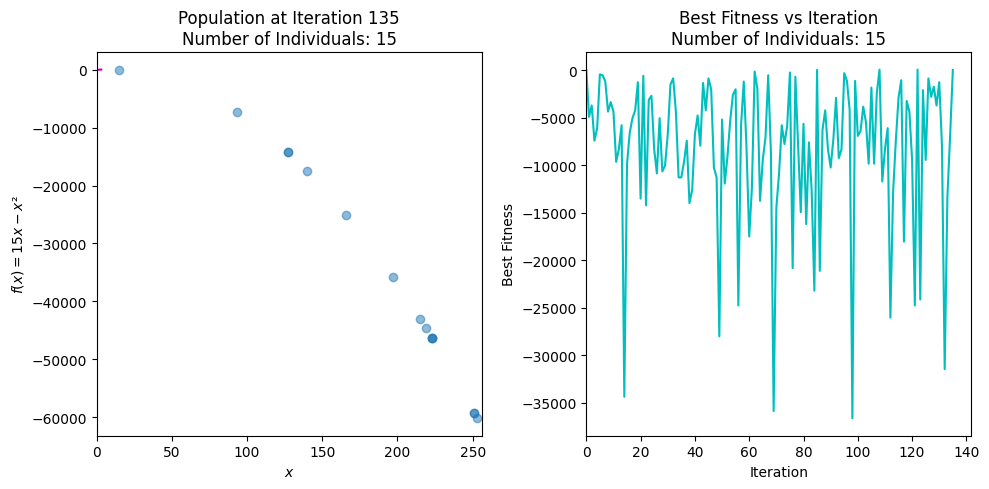

In [16]:
fs, xs, best, i, m = GeneticAlgorithm(func, pop_size=15, str_size=8, low=1, high=256, ps=(1/3), pc=1.0, pm=0.1, max_iter=1000, eps=0.001)
plot_result(func, fs, xs, best, i, m)

**References:**
Albers Uzila https://towardsdatascience.com/complete-step-by-step-genetic-algorithm-from-scratch-for-global-optimization-6fee5c55dd3b#daea